Titanic - Machine Learning from Disaster

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Kaggle: https://www.kaggle.com/c/titanic

In [46]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split

In [94]:
#Preparacion Data
df = pd.read_csv("train.csv")
inputs = df.drop('Survived',axis='columns')
target = df.Survived
x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size = 0.3, random_state = 0)

In [95]:
#Entrenamiento
from sklearn.naive_bayes import GaussianNB
x_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
dummies = pd.get_dummies(x_train.Sex )
x_train = pd.concat([x_train,dummies],axis='columns')
x_train.drop(['Sex','male'],axis='columns',inplace=True)
x_train.Age = x_train.Age.fillna(x_train.Age.median())
x_train.Fare = x_train.Fare.fillna(x_train.Fare.mean())
sc = StandardScaler()
Entrenamiento = sc.fit_transform(x_train)

#import matplotlib.pyplot as plot
#edades=x_train.Age.values.tolist()
#plot.hist(x=edades, bins=20, color='#F2AB6D', rwidth=0.85)
#plot.title('Histograma de edades - matplotlib - codigopiton.com')
#plot.xlabel('Edades')
#plot.ylabel('Frecuencia')

#Modelo Bayes
Modelo_Bayes = GaussianNB()
Modelo_Bayes.fit(Entrenamiento,y_train)

GaussianNB()

In [96]:
#Test

x_test = x_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
dummies_test = pd.get_dummies(x_test.Sex  )
x_test  = pd.concat([x_test , dummies_test],axis='columns')
x_test.drop(['Sex','male'],axis='columns',inplace=True)
x_test.Age = x_test.Age.fillna(x_test.Age.median())
x_test.Fare = x_test.Fare.fillna(x_test.Fare.mean())
x_test= sc.transform(x_test)
y_predicted = Modelo_Bayes.predict(x_test)

C:\Users\sullo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


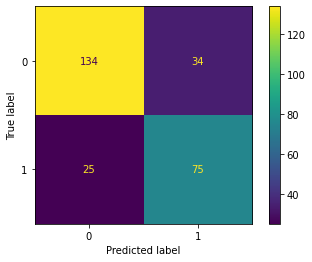

In [97]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(Modelo_Bayes,x_test, y_test)  
plt.show()